## Multiple Linear Regression and Regression Error Metrics

## Import library

In [237]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats
plt.rcParams["figure.figsize"] = (7,4)
import warnings
warnings.filterwarnings('ignore')

## Read Dataset

In [238]:
df = pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Data Preparation

In [239]:
df.shape

(200, 4)

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [241]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Distribution of features

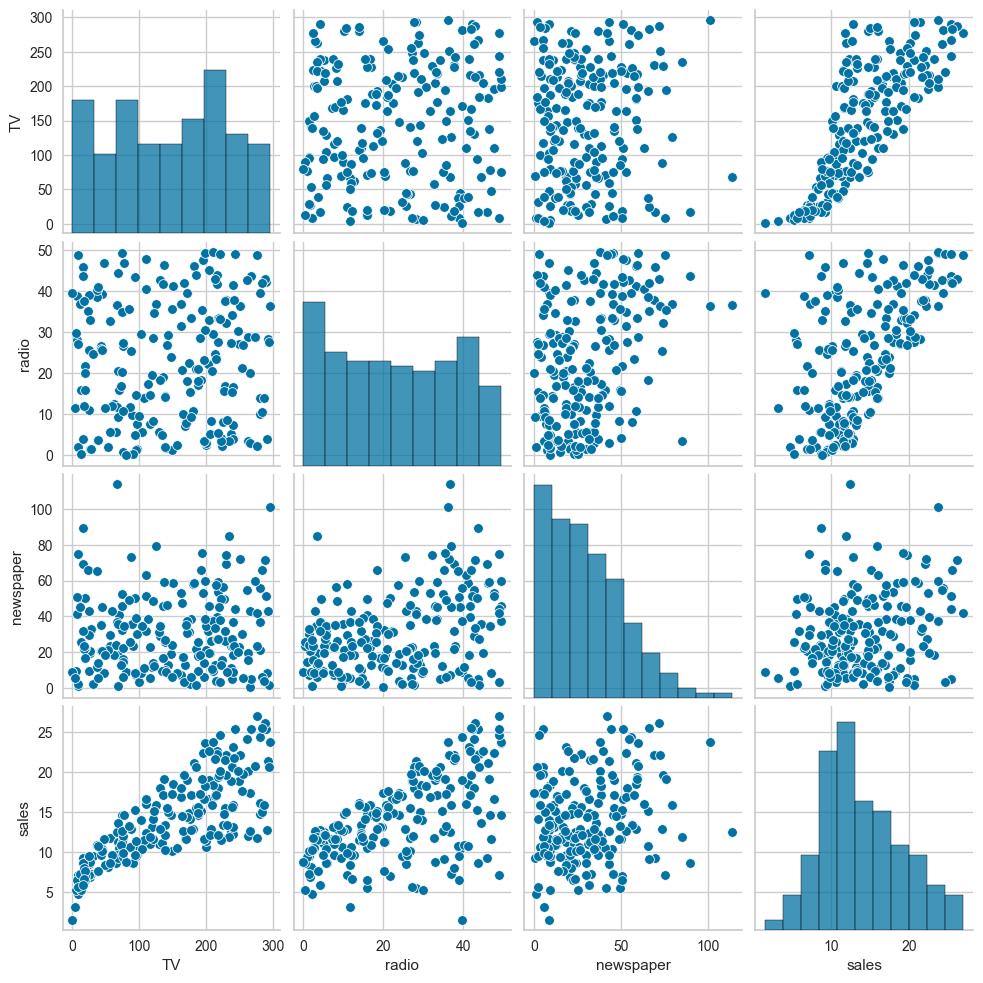

In [242]:
sns.pairplot(df)
plt.show();

In [243]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


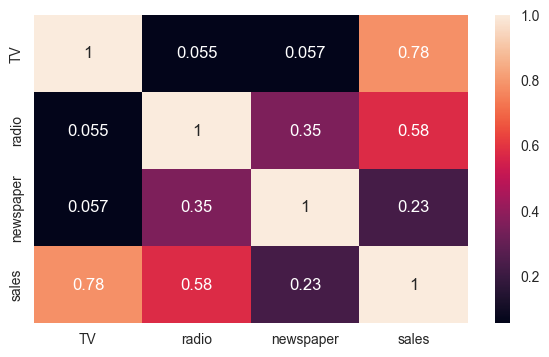

In [244]:
sns.heatmap(df.corr(), annot = True)
plt.show();

## Train-Test Split

In [245]:
# pip install scikit-learn --anaconda kullanmıyorsanız

In [246]:
X = df.drop(columns ="sales") #df[["TV", "radio", "newspaper"]]
y = df["sales"]

In [247]:
from sklearn.model_selection import train_test_split

# Modeli eğitip sonrasında prediction almak için data yukarıdaki fonksiyon ile train ve test setlerine bölüyoruz.

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

# Default olarak test_size=0.25'tir. Best practice 0.2, 0.25, 0.3 civarı değerler tercih edilir. Burdaki amaç train setine
# olabildiğince fazla veri sağlayabilmek. Özellikle küçük datalarda bu oran 0.1, 0.15 civarında seçilebilir

In [249]:
df.sample(15)
# ML datayı herzaman yapılandırılmış data (satır ve sütunlardan oluşan data) olarak ister.

# Unsupervised modellerde modele ulaşması istenen hedef (target,label) eğitim esnasında verilerek bu hedefe ulaştıracak 
# kuralların arka planda belirlenmesi istenir. Model bu kuralları (katsayı, dallanma kriterleri vb) belirledikten sonra
# model üzerinden prediction alabiliriz.

,TV,radio,newspaper,sales
191,75.5,10.8,6.0,9.9
90,134.3,4.9,9.3,11.2
104,238.2,34.3,5.3,20.7
158,11.7,36.9,45.2,7.3
73,129.4,5.7,31.3,11.0
148,38.0,40.3,11.9,10.9
105,137.9,46.4,59.0,19.2
126,7.8,38.9,50.6,6.6
151,121.0,8.4,48.7,11.6
18,69.2,20.5,18.3,11.3


In [250]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (160, 3)
Train target shape   :  (160,)
Test features shape  :  (40, 3)
Test target shape    :  (40,)


In [251]:
X_train

# X_trainin yapısı

,TV,radio,newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [252]:
X_test

# X_testin yapısı

,TV,radio,newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2
115,75.1,35.0,52.7
69,216.8,43.9,27.2
170,50.0,11.6,18.4
174,222.4,3.4,13.1
45,175.1,22.5,31.5


In [253]:
y_train

# y_trainin yapısı

79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: sales, Length: 160, dtype: float64

In [254]:
y_test

# y_testin yapısı

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
Name: sales, dtype: float64

## Model Fitting and Compare Actual and Predicted Labels

In [255]:
from sklearn.linear_model import LinearRegression

# LinearRegression algortimasını import ediyoruz.

In [256]:
model = LinearRegression()

# Algoritmamızı her zaman bir değişkene atıyoruz. Aksi taktirde prediction alırken hata alırız.

In [257]:
model.fit(X_train, y_train) 

# Burada model yerine LinearRegression() yazrsanız kod çalışır. Ancak aşağıdaki hücrede prediction alırken 
# LinearRegression() kullanırsanız hata alırsınız. Bu hatanın önüne geçmek için model =LinearRegression() atamasını mutlaka 
# yapıyoruz.

LinearRegression()

In [258]:
y_pred = model.predict(X_test) # model yerine LinearRegression() yazarsanız hata aldığınızı görürsünüz.
y_pred

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [259]:
X_train.head(1)

,TV,radio,newspaper
79,116.0,7.7,23.1


In [260]:
model.coef_

# katsayıların sıralaması. Modele eğitim için verdiğimiz X_train datasının feature sıralamasıyla aynıdır.
# katsıyları featurların tahmin üzerindeki etkisini görmek ve feature selection için kullanacağız.

array([0.04472952, 0.18919505, 0.00276111])

In [261]:
model.intercept_

2.9790673381226256

In [262]:
X_test.loc[[95]]

,TV,radio,newspaper
95,163.3,31.6,52.9


In [263]:
y_test.loc[95]

16.9

In [264]:
model.predict(X_test.loc[[95]]) # ML algoritmaları eğitim ve prediction için verilen dataları 2 boyutlu ister.

array([16.4080242])

In [265]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Residual":y_test-y_pred, "LSE":(y_test-y_pred)**2, "ABS": abs(y_test-y_pred)}

In [266]:
comparing = pd.DataFrame(my_dict)
comparing

# Simple linear reg. dersimizde bahsettiğimiz gibi error metriclerinin LSE ve ABS üzerinden nasıl hesaplandığını 
# göreceğiz.

,Actual,Pred,Residual,LSE,ABS
95,16.9,16.408024,0.491976,0.242040,0.491976
15,22.4,20.889882,1.510118,2.280456,1.510118
30,21.4,21.553843,-0.153843,0.023668,0.153843
158,7.3,10.608503,-3.308503,10.946189,3.308503
128,24.7,22.112373,2.587627,6.695812,2.587627
115,12.6,13.105592,-0.505592,0.255623,0.505592
69,22.3,21.057192,1.242808,1.544572,1.242808
170,8.4,7.461010,0.938990,0.881702,0.938990
174,11.5,13.606346,-2.106346,4.436693,2.106346
45,14.9,15.155070,-0.255070,0.065061,0.255070


In [267]:
result_sample = comparing.iloc[:, :3]
result_sample

# actual, pred ve residual'u görselleştirmek için df'in ilk 3 featurenı filtreledik

,Actual,Pred,Residual
95,16.9,16.408024,0.491976
15,22.4,20.889882,1.510118
30,21.4,21.553843,-0.153843
158,7.3,10.608503,-3.308503
128,24.7,22.112373,2.587627
115,12.6,13.105592,-0.505592
69,22.3,21.057192,1.242808
170,8.4,7.461010,0.938990
174,11.5,13.606346,-2.106346
45,14.9,15.155070,-0.255070


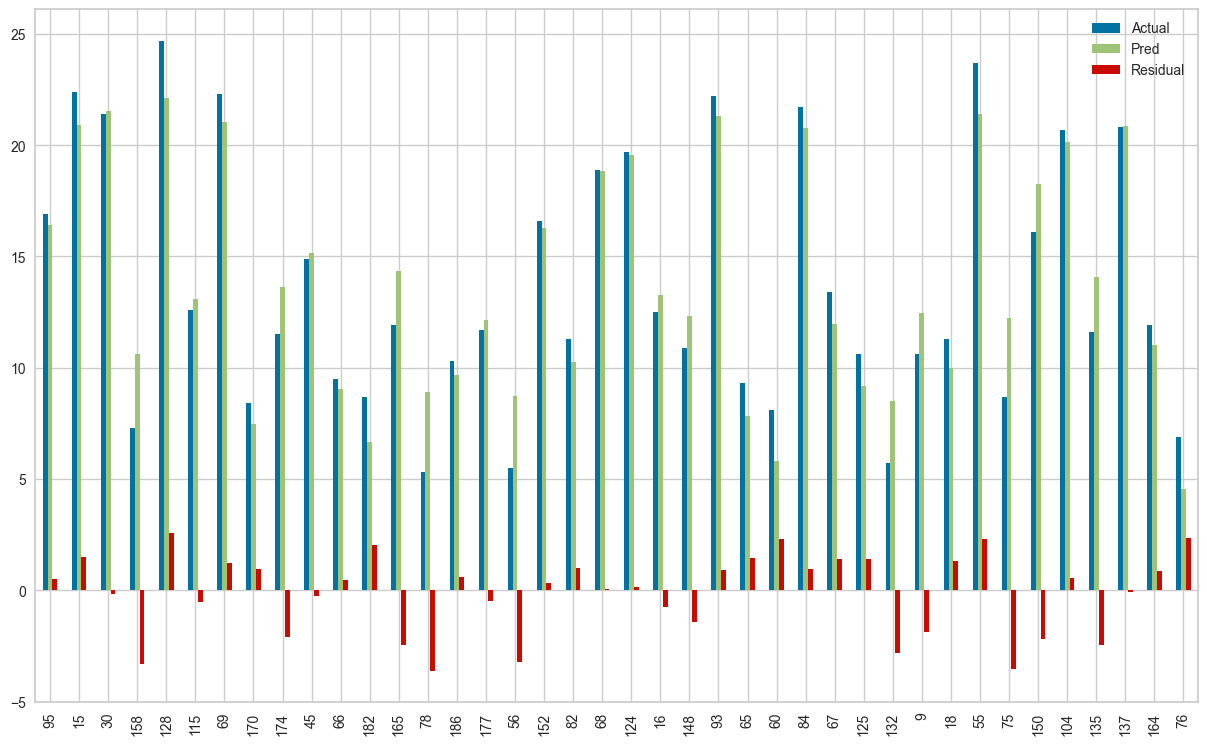

In [268]:
result_sample.plot(kind ="bar", figsize=(15,9))
plt.show();

## Error Metrics

In [269]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [270]:
R2_score = r2_score(y_test, y_pred)
R2_score

# R2_score, elimizdeki mevcut featurlar ile targettaki değişimin ne kadarını açıklayabiliyorum.
# Veya targetı doğru tahmin edebilmek için gerekli olan bilginin ne kadarına sahibim sorularına cevap verir.

0.899438024100912

In [271]:
mae = mean_absolute_error(y_test, y_pred) #comparing.ABS.sum()/X_test.shape[0]
mae

# Modelin yaptığı tahminler ile gerçek değerler arasındaki farkların (residuallerin) mutlak değerlerinin toplamının
# gözlem sayısına bölünmesi sonucunda modelin yaptığı ortala mutlak hata (mae) tespit edilir. mae yapılan kötü tahminleri
# cezalandırmadığından tercih edilmez.

1.4607567168117606

In [272]:
#comparing.ABS.sum()/X_test.shape[0]

In [273]:
X_test.shape

(40, 3)

In [274]:
mse = mean_squared_error(y_test, y_pred) # comparing.LSE.sum()/X_test.shape[0]
mse

# Modelin yaptığı tahminler ile gerçek değerler arasındaki farkların (residuallerin) karesinin toplamının gözlem sayısına
# bölünmesi sonucunda modelin yaptığı ortala kare hata (mse) tespit edilir. mse yapılan kötü tahminleri
# cezalandırır ama target biriminin karesi olduğundan yorumlanması zordur. Bu sebeple tercih edilmez

3.174097353976105

In [275]:
#comparing.LSE.sum()/X_test.shape[0]

In [276]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) #(comparing.LSE.sum()/X_test.shape[0])**0.5
rmse

# Modelin yaptığı tahminler ile gerçek değerler arasındaki farkların (residuallerin) karesinin toplamının gözlem sayısına
# bölünmesi sonucunda modelin yaptığı ortala kare hata (mse) tespit edilir ve mse'nin karakökü alınarak error metriğimiz
# target ile aynı birime dönüştürülür. Bu şekilde yorumlanması ve anlaşılması kolay bir hale gelir. rmse yapılan kötü 
# tahminleri hem cezalandırır hemde targetla aynı birim olduğundan yorumlanması kolaydır. Bu sebeple çoğunlukla bu metric 
# tercih edilir.

1.7815996615334504

In [277]:
#(comparing.LSE.sum()/X_test.shape[0])**0.5

In [278]:
sales_mean = df["sales"].mean()
sales_mean

# metricleri yorumlamak için önce targetin ortalamasını alıyoruz.

14.0225

In [279]:
mae / sales_mean

# Modelden aldığımız predictionların genel performansını yorumlamak için mae ve rmse değerlerini ortalama target değerine 
# bölerek modelin ortalama yaptığı hatayı buluruz. mae'e göre model ortalama %10 hata yaptığını tespit ettik.

0.1041723456453386

In [280]:
rmse / sales_mean

# rmse metriğine göre modelimiz ortalama %13 hata yapıyor.
# Kötü tahmnileri cezalndırdığı için rmse metriğimizi tercih ediyoruz. Ve müşteriye modelimizin ortalama %13 hata 
# yaptığı bilgisini veriyoruz.

0.127052926477693

## Adjusted R2 score 

https://towardsdatascience.com/demystifying-r-squared-and-adjusted-r-squared-52903c006a60

In [281]:
def adj_r2(y_test, y_pred, X):
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0] # number of observations (rows)
    p = X.shape[1] # number of independent variables 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

# feature sayısı row sayısına göre çok fazla olan datalarda düzeltilmiş R2_score bakmamız gerekir. Bu tür datalarda fazla 
# olan feature sayısı r2_score'da yalancı bir iyileştirme yapar. Sklearn kütüphanesinde düzeltilmiş r2 score fonksiyonu 
# bulunmadığından manuel olarak fonksiyon oluşturulmuştur. Fonksiyon feature ie satır  sayısı arasındaki trade off'a göre
# r2_score belirliyor. Feature sayısına göre satır sayısı az kalırsa r2 scorenda yalancı bir artış olur. 

In [282]:
X.shape

(200, 3)

In [283]:
adj_r2(y_test, y_pred, X)

0.8978988101840892

## What is the concept of punishment for RMSE error metric?

In [284]:
variables = {"Actual": [1000, 2000, 3000, 4000, 5000], "pred": [1100, 2200, 3200, 4200, 5300]} # 5300

# rsme metricinin cezalandırmayı nasıl yaptığına dair ufak bir örnek yapalım. ilk önce yukardaki değerlere göre mae ve 
# rmse değerlerine bakarak yorumumuzu aşağıda yapalım.

In [285]:
df_2 = pd.DataFrame(variables)
df_2

,Actual,pred
0,1000,1100
1,2000,2200
2,3000,3200
3,4000,4200
4,5000,5300


In [286]:
df_2

,Actual,pred
0,1000,1100
1,2000,2200
2,3000,3200
3,4000,4200
4,5000,5300


In [287]:
#mae
y_real = df_2.Actual
y_prediction = df_2.pred

mean_absolute_error(y_real, y_prediction)

200.0

In [288]:
#rmse

np.sqrt(mean_squared_error(y_real, y_prediction))

# Gördüğünüz gibi tahmin edilen değerler ile gerçek değerler biribirine yakınken aldığımız mae ve rmse değerleri de 
# nispeten biribirlerine yakın oluyor.

209.76176963403032

In [289]:
variables2 = {"Actual": [1000, 2000, 3000, 4000, 5000], "pred": [1100, 2200, 3200, 4200, 6000]} # 5300

# şimdi 5300 olan prediction değerimizi 6000 olarak değiştiriyoruz. Ve yukardaki aynı işlemleri tekrarlayarak yeni mae ve
# rmse metriclerimizi buluyoruz.

In [290]:
df_3 = pd.DataFrame(variables2)
df_3

,Actual,pred
0,1000,1100
1,2000,2200
2,3000,3200
3,4000,4200
4,5000,6000


In [291]:
#mae

y_real = df_3.Actual
y_prediction = df_3.pred

mean_absolute_error(y_real, y_prediction)

340.0

In [292]:
#rmse

np.sqrt(mean_squared_error(y_real, y_prediction))

# Gördüğünüz gibi datamızda kötü tahmin edilen gözlem veya gözlemler olduğunda mae ve rmse metricleri arasındaki fark ciddi
# şekilde açılıyor. Eğer mae ve rmse biribirine ne kadar yakınsa modelimizde kötü yapılan tahmniler olmadığına dair 
# insightler elde ederiz. Lakin uçurum/ fark varsa modelimzde çok kötü yapılan tahminler var demektir. Datayı daha 
# derinlemesine incelemek gerekir.

475.3945729601885

## Evaluation Model

In [293]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score : {R2_score}")
    print(f"MAE {'':<5}: {mae}")
    print(f"MSE {'':<5}: {mse}")
    print(f"RMSE{'':<5}: {rmse}")
    
# tüm regression metriclerimizi birarada görmek için yukarıdaki fonksiyonu tanımlıyoruz.

In [294]:
eval_metric(y_test, y_pred)

# önce test seti üzerinden metriclerimizi alıyoruz.

Model testing performance:
--------------------------
R2_score : 0.899438024100912
MAE      : 1.4607567168117606
MSE      : 3.174097353976105
RMSE     : 1.7815996615334504


In [295]:
y_train_pred = model.predict(X_train)

In [296]:
eval_metric(y_train, y_train_pred)

# daha sonra train seti üzerinden metriclerimizi de alarak modelin hiç görmediği data üzerinden aldığı scorlar ile eğitim 
# datası üzerinden aldığı scorları karşılaştırıyoruz. Eğer skorlar biribirne yakınsa model genelleyebiliyor demektir.
# Lakin skorlar arasında ciddi farklar varsa model genelleyemiyor demektir.

Model testing performance:
--------------------------
R2_score : 0.8957008271017817
MAE      : 1.198467896150014
MSE      : 2.705129423081414
RMSE     : 1.644727765644337


## Is data suitable for linear regression?

https://stats.stackexchange.com/questions/12262/what-if-residuals-are-normally-distributed-but-y-is-not

In [297]:
# yukarıdaki verilen link'te bir datadaki featureların ve targetin dağılımları aynı veya benzer ise linear regression 
# modelinden aldığımız scorlarında belirgin bir iyileşme olacağını belirtmektedir. Genel kültür olarak aklınızda bulunsun

## Plotting residuals

In [298]:
residuals = y_test-y_pred

# Bir datanın linear reg. uygun olup olmadığını anlamak için gerekli olan bazı assumptionların kontrolü için önce
# test datasındaki residualleri hesaplıyoruz.

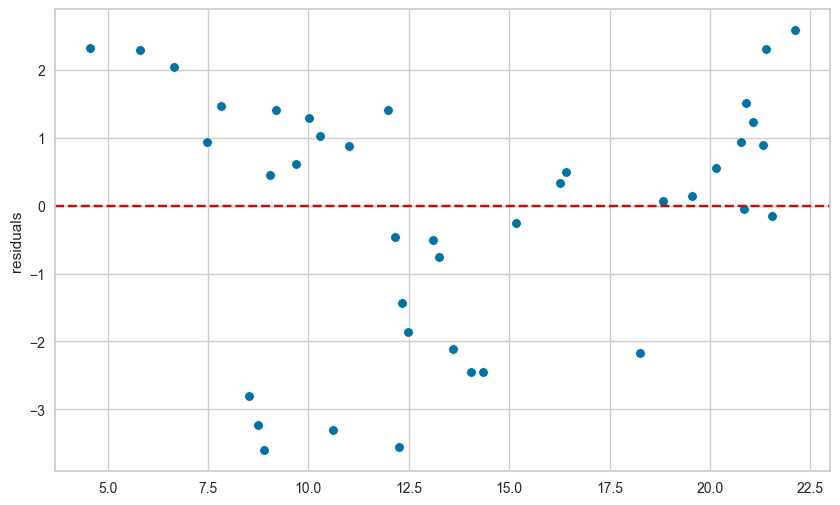

In [299]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_pred, y = residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show();

# simple linear reg. özelinde feature ile target arasında anlamlı bir corr varsa data linear reg. için uygundur 
# diyebiliyorduk. Ancak, multiple lin.reg.da tüm featurlar ile target arasındaki anlamlı corr ilişkisine bakarak yorum
# yapmak bizi yanıltabilir. Bu durumlarda aşağıdaki assumptionları arayacağız.


# residulaer;
# 1. hatanın 0 olduğu eksenin her iki tarafınada yaklaşık olarak hem eşit hem de random  olarak dağılacak
# 2. Bu dağılım normal dağılıma uygun olacak
# eğer bu şartlar sağlanıyorsa data linear reg. için uygun bir datadır diyebiliriz.

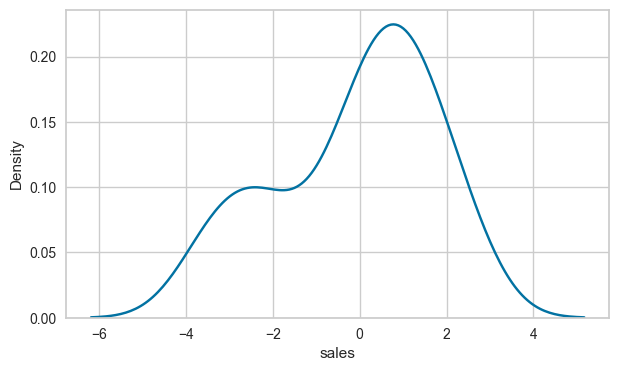

In [300]:
sns.kdeplot(residuals)
plt.show();

# residulerin kdeplotu üzerinden normal dağılıma uyup uymadığ kontrol edilebilir

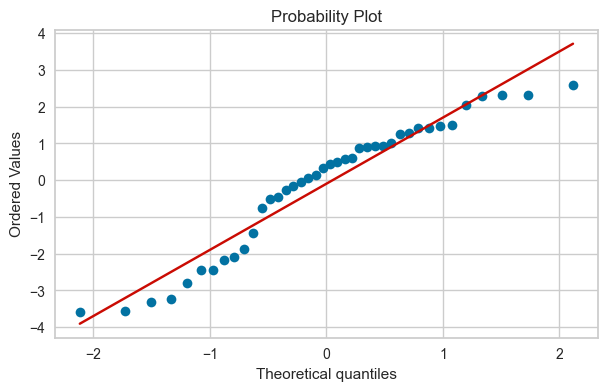

In [301]:
stats.probplot(residuals, dist ="norm", plot =plt)
plt.show();


# ayrıca residulerin probability plot üzerinden de normal dağılıma uyup uymadığ kontrol edilebilir

In [302]:
from scipy.stats import skew
skew(residuals)

# skew değerleri üzerinden de yorum yapabiliriz. skew değeri -0.5 ile +0.5 arasında ise datanın normal dağılıma çok uygun 
# olduğunu, -1 ile +1 arasındaki değerlerin normal dağılıma uygun olduğunu,
# -1, +1 değerlerinden sonra yavaş yavaş normal dağılımın bozulmaya başladığını söyleyebiliriz.

-0.5399061927739802

In [303]:
# pip install yellowbrick (anaconda kullanmayanlar bu kodu kullansınlar)
# conda install -c districtdatalabs yellowbrick  (conda kullananlar bu kodu kullansınlar)

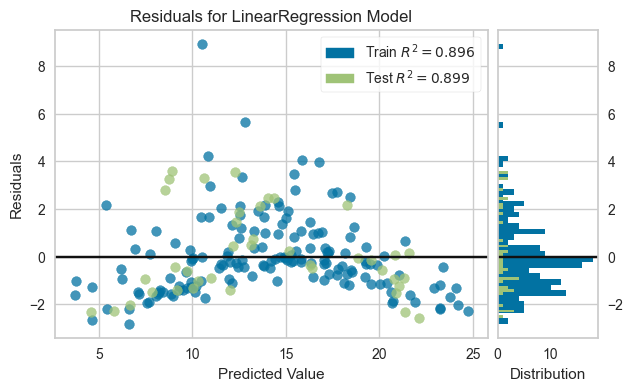

In [304]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();                # Finalize and render the figure

# son zamanlarda ML görselleştirmelerinde sıklıkla tercih edilen bir kütüphane
# residuallerin dağılımına hem train jem de test seti için bakabiliyoruz.

## Prediction Error for LinearRegression

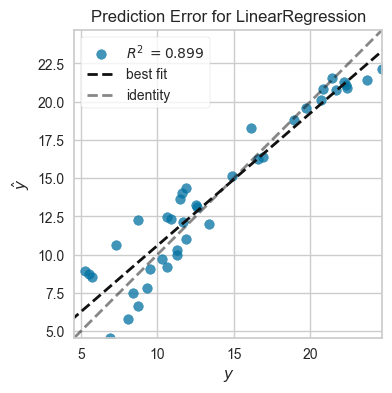

In [305]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

# y ekseninde predictionlarımız, x ekseninde ise gerçek değerlerimiz yer alıyor. silik olan çizgi modelin tahmnilerinin
# mükemmel olduğu noktaları. koyu renki olan çizgi ise modelimizin eğitim sonrası çizdiğ best fit line temsil ediyor.
# koyu olan çizgi ile silik olan çizgi ne kadar birbirine yakın olursa modelin tahminleri o kdar iyi demektir.

## Retraining Model on Full Data

In [306]:
final_model = LinearRegression()

# Eğitim tamamlanıp metriclerimizi kontrol ettikten sonra modelin genelleme yaptığından de emin olduktan sonra final
# modelimizi oluşturabiliriz.

In [307]:
final_model.fit(X, y)

# Artık modeli tüm data ile eğitiyoruz.

LinearRegression()

## Coefficients

In [308]:
final_model.coef_

# Eğitim sonrası elde ettiğimiz katsayılar üzerinden featurların target üzerinde ne kadar etkisi olduğuna dair yorumları
# bu katsayılar üzerinden yapacağız.
# Örneğin TV featurandaki 1 birimlik artış targetta TV katsayısı (0.04576465) kadar artış yaparken, radio featurandaki
# 1 birimlik artış targetta radio katsayısı (-0.00103749) kadar azalış yapar.
# katsayıların büyüklüğüne göre hangi featuran model için önemli olduğuna karar veririz.

array([ 0.04576465,  0.18853002, -0.00103749])

In [309]:
final_model.intercept_

2.938889369459412

In [310]:
X.head()

# katsayıların sırlaması X'deki featura sıralamsıyla aynı

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


## Prediction on New Data

In [311]:
adv = [[150, 20, 15]]

# yeni bir gözle için prediction alalım. Gözlemin 2 boyutlu olması için 2 köşeli parantez içine alıyoruz. ML modelleri
# eğitim ve prediction için dataları 2 boyutlu istediğini unutmayalım.

In [312]:
adv

[[150, 20, 15]]

In [313]:
final_model.predict(adv)

# predictionımzı sklearn ile aldık.

array([13.55862413])

In [314]:
adv_2 = [[150, 20, 15], [160, 20, 15]]

# 2 farklı gözlem için prediction alacağız. 2. gözlem de TV featuranı 10 birim artirıyoruz. diğerleri sabit kalıyor.

In [315]:
final_model.predict(adv_2)

# predictionlarımızı alıyoruz.

array([13.55862413, 14.01627059])

In [316]:
14.01627059 - 13.55862413

# gördüğünüz gibi 2 prediction arasındaki fark TV katsayısının 10 katı

0.4576464599999994

## The effect of features on the predicted label

In [317]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [318]:
df.describe()

# Katsayıların büyüklüğüne göre hangi featuran öenmli olduğuna karar vermeden önce tüm featurların aynı scalada olması 
# gerektiğini unutmayın. Tüm featurlar aynı scalada olmadığı için radio daha önemli bir featura olarak görünüyor. 
# Bu konuya ilerleyen derslerde gireceğiz.

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [319]:
df.corr()

# Linear regression özelinde target ile feature arasındaki corr ne kadar büyükse o featuren model için de o kadar önemli 
# bir feature olduğuna dair bize bir insight sağlar. Ancak hangi feature önemli sorusuna corr. bakarak cevap vermiyeceğiz
# ileriki derslerimizde nasıl yapılacağı sizlere anlatılacak.

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000
